Path found (either A* or random walk): [(0, 0), (1, 0), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4)]


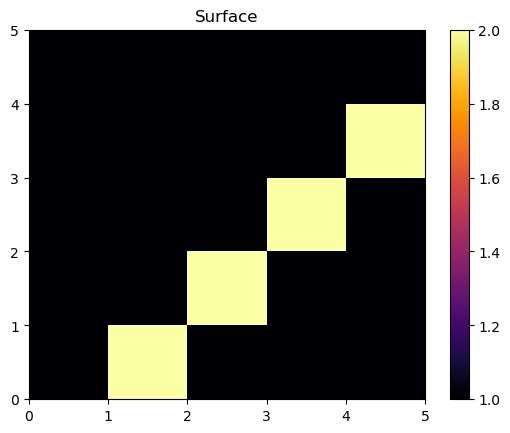

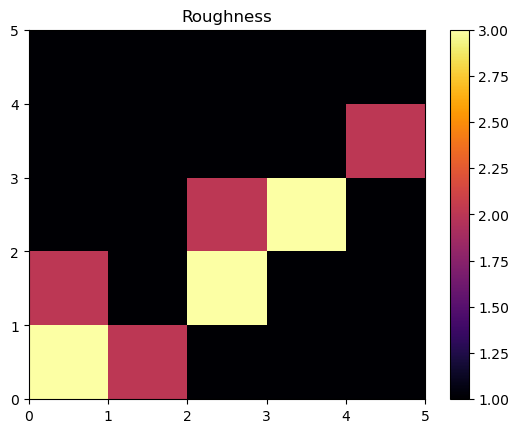

In [1]:
import heapq
import random

class Node:
    def __init__(self, position, parent=None, cost=0, heuristic=0):
        self.position = position
        self.parent = parent
        self.cost = cost
        self.heuristic = heuristic

    def __lt__(self, other):
        return (self.cost + self.heuristic) < (other.cost + other.heuristic)

def heuristic_estimate(start, goal, surface, roughness):
    start_row, start_col = start
    goal_row, goal_col = goal

    elevation_difference = abs(surface[start_row][start_col] - surface[goal_row][goal_col])
    roughness_difference = abs(roughness[start_row][start_col] - roughness[goal_row][goal_col])

    # Adjust the heuristic function based on elevation and roughness
    heuristic_value = max(elevation_difference, roughness_difference)

    return heuristic_value

def calculate_cost(current_position, neighbor_position, surface, roughness):
    current_row, current_col = current_position
    neighbor_row, neighbor_col = neighbor_position

    elevation_difference = abs(surface[current_row][current_col] - surface[neighbor_row][neighbor_col])
    roughness_difference = abs(roughness[current_row][current_col] - roughness[neighbor_row][neighbor_col])

    # Adjust the cost function based on elevation and roughness
    cost = 1 + elevation_difference + 0.5 * roughness_difference
    return cost

def get_neighbors(position, surface):
    row, col = position
    neighbors = [
        (row + 1, col),
        (row - 1, col),
        (row, col + 1),
        (row, col - 1),
    ]
    return neighbors

def is_valid_position(position, surface):
    row, col = position
    return 0 <= row < len(surface) and 0 <= col < len(surface[0])

def astar_with_random_walk(surface, roughness, start, goal, max_steps=1000):
    open_set = [Node(start, None, 0, heuristic_estimate(start, goal, surface, roughness))]
    closed_set = set()

    while open_set:
        current_node = heapq.heappop(open_set)

        if current_node.position == goal:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]

        closed_set.add(current_node.position)

        neighbors = get_neighbors(current_node.position, surface)

        for neighbor_position in neighbors:
            if (
                is_valid_position(neighbor_position, surface)
                and neighbor_position not in closed_set
            ):
                new_cost = current_node.cost + calculate_cost(
                    current_node.position, neighbor_position, surface, roughness
                )
                new_heuristic = heuristic_estimate(neighbor_position, goal, surface, roughness)
                new_node = Node(
                    neighbor_position, current_node, new_cost, new_heuristic
                )

                if new_node not in open_set:
                    heapq.heappush(open_set, new_node)

    # If A* doesn't find a path, use random walk as a fallback
    random_walk_start = (current_node.position[0], current_node.position[1]) if current_node else start
    random_walk_path = random_walk(random_walk_start, goal, max_steps)

    return random_walk_path

# Example usage:
surface_example = [
    [1, 2, 1, 1, 1],
    [1, 1, 2, 1, 1],
    [1, 1, 1, 2, 1],
    [1, 1, 1, 1, 2],
    [1, 1, 1, 1, 1],
]

roughness_example = [
    [3, 2, 1, 1, 1],
    [2, 1, 3, 1, 1],
    [1, 1, 2, 3, 1],
    [1, 1, 1, 1, 2],
    [1, 1, 1, 1, 1],
]

start_example = (0, 0)
goal_example = (4, 4)

path = astar_with_random_walk(surface_example, roughness_example, start_example, goal_example)
if path:
    print("Path found (either A* or random walk):", path)
else:
    print("No path found within the maximum steps.")
    
    import numpy as np
import matplotlib.pyplot as plt

def plot_surface(surface):
  """Plots a surface using a heatmap."""
  plt.figure()
  plt.pcolormesh(surface, cmap='inferno')
  plt.colorbar()
  plt.title('Surface')

def plot_roughness(roughness):
  """Plots a roughness map using a heatmap."""
  plt.figure()
  plt.pcolormesh(roughness, cmap='inferno')
  plt.colorbar()
  plt.title('Roughness')

# Plot the surface example.
plot_surface(surface_example)

# Plot the roughness example.
plot_roughness(roughness_example)

# Show the plots.
plt.show()

